In [14]:
%reload_ext nb_black
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import normaltest
from scipy.stats import boxcox


warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

postgres_user = "dsbc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "studentsperformance"

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
engine = create_engine(
    "postgresql://{}:{}@{}:{}/{}".format(
        postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
    )
)

students = pd.read_sql_query("select * from studentsperformance", con=engine)

# no need for an open connection,
# as we're only doing a single query
engine.dispose()

<IPython.core.display.Javascript object>

1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

In [7]:
test_scores = students[["math score", "reading score", "writing score"]]

for col in test_scores:
    norm_stats = normaltest(test_scores[col])
    print(
        "Normality test for {} has results: {}, p = {}".format(
            col, norm_stats[0], norm_stats[1]
        )
    )

Normality test for math score has results: 15.408960513931822, p = 0.00045080293869937836
Normality test for reading score has results: 11.11741279628622, p = 0.003853758403576582
Normality test for writing score has results: 13.606450837263859, p = 0.0011101885439899974


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
students["math score"].value_counts()
# remove zero for boxcox

65    36
62    35
59    32
69    32
73    27
      ..
22     1
19     1
18     1
8      1
0      1
Name: math score, Length: 81, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
students = students[students["math score"] != 0]
students["math score"].value_counts()

65    36
62    35
59    32
69    32
73    27
      ..
23     1
22     1
19     1
18     1
8      1
Name: math score, Length: 80, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
boxcox(students["math score"])

tuple

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
math_boxcox, _ = boxcox(students["math score"])
reading_boxcox, _ = boxcox(students["reading score"])
writing_boxcox, _ = boxcox(students["writing score"])

boxcoxes = {"math": math_boxcox, "reading": reading_boxcox, "writing": writing_boxcox}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Normality test for math has results: 1.8323075851586939, p = 0.4000547794685686


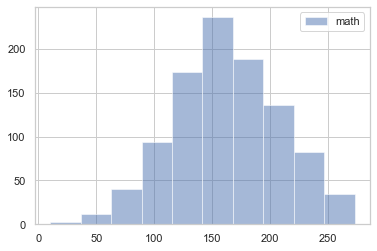

Normality test for reading has results: 6.546500254297637, p = 0.03788310187455936


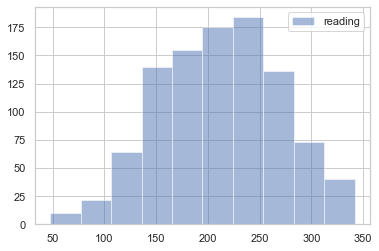

Normality test for writing has results: 8.018367650263817, p = 0.018148201299612785


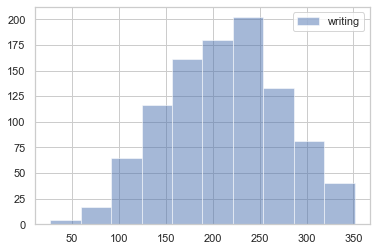

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [64]:
for subject, values in boxcoxes.items():
    norm_stats = normaltest(values)
    print(
        "Normality test for {} has results: {}, p = {}".format(
            subject, norm_stats[0], norm_stats[1]
        )
    )
    plt.hist(values, alpha=0.5, label=subject)
    plt.legend()
    plt.show()

With the boxcox, all three score distributions are now normal

2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

In [39]:
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
students["avg score"] = (
    students["math score"] + students["reading score"] + students["writing score"]
) / 3
students["avg score"].head()

0    72.666667
1    82.333333
2    92.666667
3    49.333333
4    76.333333
Name: avg score, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
normaltest(students["avg score"])
# not normal, boxcox it

NormaltestResult(statistic=10.127189207749474, pvalue=0.006322790687068094)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
avg_score_boxcox, _ = boxcox(students["avg score"])
normaltest(avg_score_boxcox)
# it's normal!

NormaltestResult(statistic=4.219879978703656, pvalue=0.12124524222064059)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

In [53]:
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       999 non-null    object 
 1   race/ethnicity               999 non-null    object 
 2   parental level of education  999 non-null    object 
 3   lunch                        999 non-null    object 
 4   test preparation course      999 non-null    object 
 5   math score                   999 non-null    int64  
 6   reading score                999 non-null    int64  
 7   writing score                999 non-null    int64  
 8   avg score                    999 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 78.0+ KB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [57]:
poss_feats = students[
    [
        "gender",
        "race/ethnicity",
        "parental level of education",
        "lunch",
        "test preparation course",
    ]
]



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

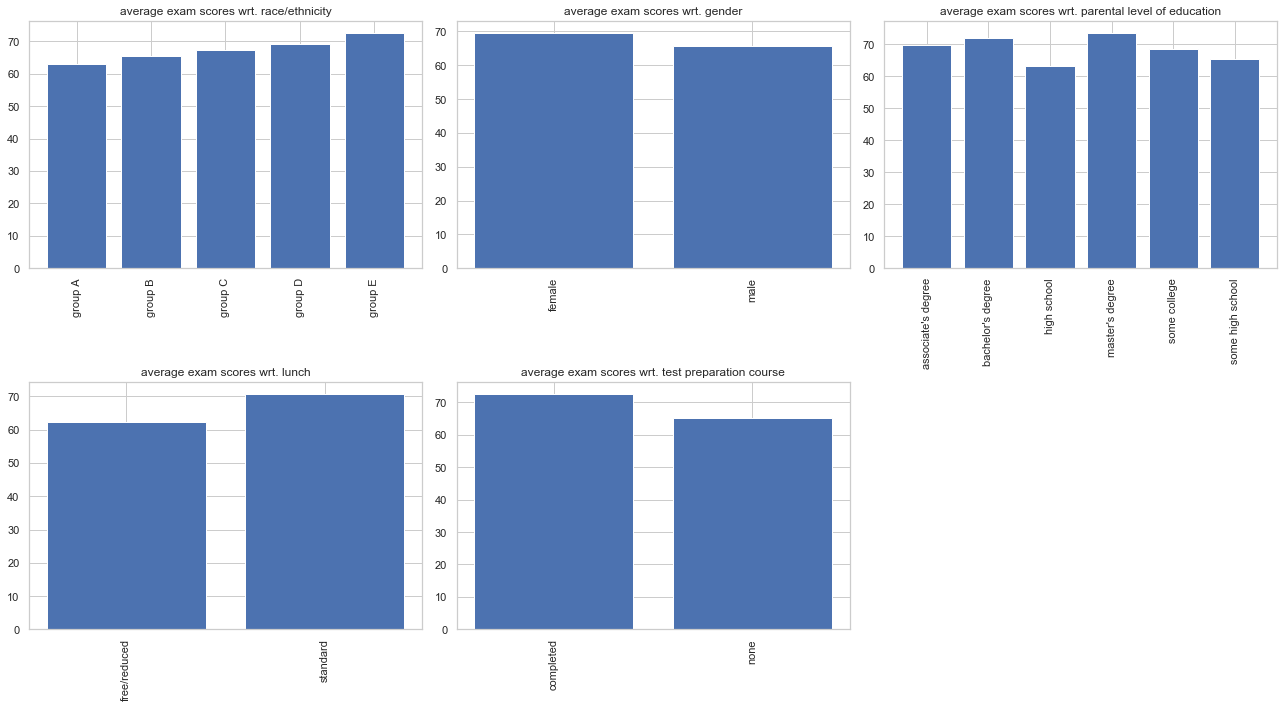

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [60]:
# make each plot individually.
# thank you, readings

plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
plt.bar(
    students.groupby("race/ethnicity")["avg score"].mean().index,
    students.groupby("race/ethnicity")["avg score"].mean(),
)

plt.title("average exam scores wrt. race/ethnicity")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 2)
plt.bar(
    students.groupby("gender")["avg score"].mean().index,
    students.groupby("gender")["avg score"].mean(),
)

plt.title("average exam scores wrt. gender")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 3)
plt.bar(
    students.groupby("parental level of education")["avg score"].mean().index,
    students.groupby("parental level of education")["avg score"].mean(),
)

plt.title("average exam scores wrt. parental level of education")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 4)
plt.bar(
    students.groupby("lunch")["avg score"].mean().index,
    students.groupby("lunch")["avg score"].mean(),
)

plt.title("average exam scores wrt. lunch")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 5)
plt.bar(
    students.groupby("test preparation course")["avg score"].mean().index,
    students.groupby("test preparation course")["avg score"].mean(),
)

plt.title("average exam scores wrt. test preparation course")
plt.xticks(rotation="vertical")

plt.tight_layout()
plt.show()